<h2 style='color:blue' align="center">Logistic Regression: Multiclass Classification</h2>

In this tutorial we will see how to use logistic regression for multiclass classification. 

In [50]:
from sklearn.datasets import load_digits
%matplotlib inline
import matplotlib.pyplot as plt
digits = load_digits()

In [51]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [52]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [53]:
digits.target[0:5]

array([0, 1, 2, 3, 4])

<Figure size 640x480 with 0 Axes>

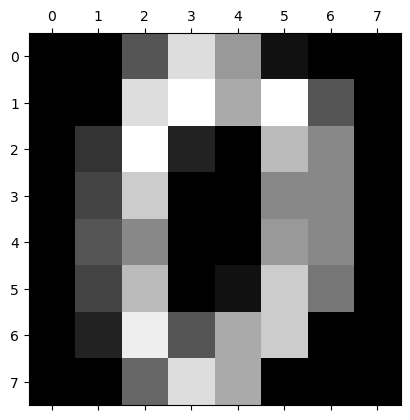

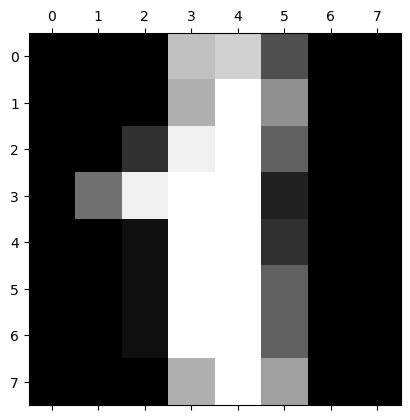

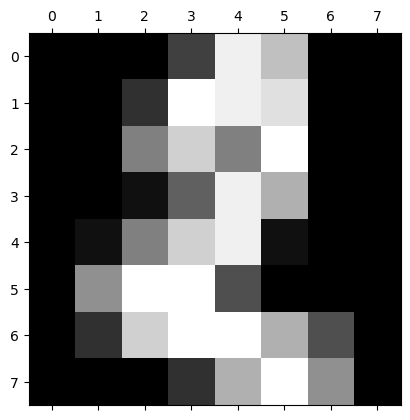

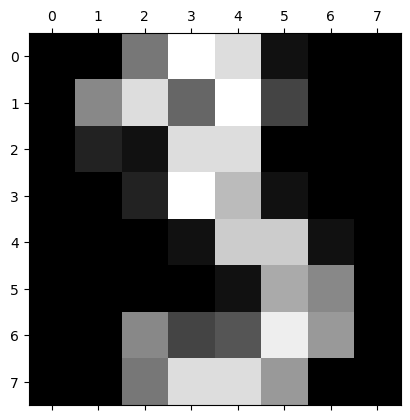

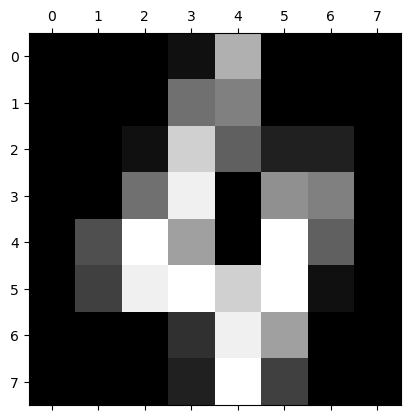

In [54]:
plt.gray() 
for i in range(5):
    plt.matshow(digits.images[i]) 

<h4 style='color:purple'>Create and train logistic regression model</h4>

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
X_train, X_test, y_train, y_test = train_test_split(digits.data,digits.target, test_size=0.2)

In [57]:
len(X_train)

1437

In [58]:
len(X_test)

360

In [59]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [60]:
model.fit(X_train, y_train)

E:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

<h4 style='color:purple'>Measure accuracy of our model</h4>

In [61]:
model.score(X_test, y_test)

0.9555555555555556

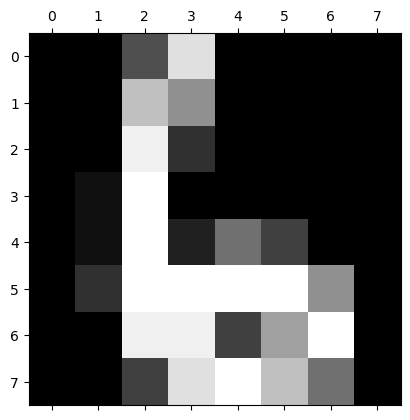

In [62]:
plt.matshow(digits.images[67])

In [63]:
digits.target[67]

6

In [64]:
model.predict([digits.data[67]])

array([6])

In [65]:
model.predict(digits.data[0:5])

array([0, 1, 2, 3, 4])

<h4 style='color:purple'>Confusion Matrix</h4>

In [66]:
y_predicted = model.predict(X_test)

In [67]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[39,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 30,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  1, 40,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 36,  0,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  0, 29,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0, 35,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 35,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 38,  0,  2],
       [ 0,  2,  0,  0,  1,  0,  0,  0, 31,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  4, 31]], dtype=int64)

混淆矩阵的每一行代表真实标签，每一列代表预测标签，因此矩阵中第 (i, j) 个元素表示真实标签为 i，而模型预测标签为 j 的样本个数。

Text(95.72222222222221, 0.5, 'Truth')

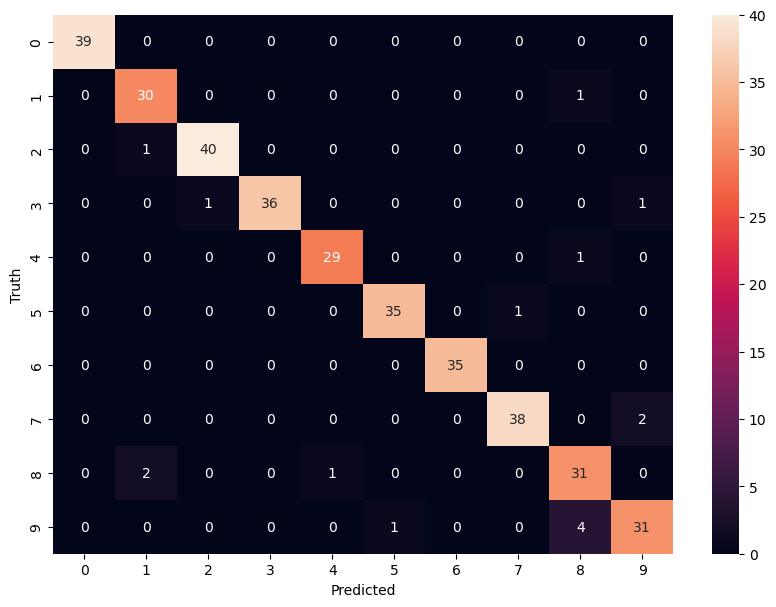

In [70]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

这段代码是用 seaborn 库中的 heatmap 函数绘制混淆矩阵（confusion matrix）的可视化结果。

首先，我们创建一个 10x10 的图像（10 表示数字的类别数）。然后，我们使用 seaborn 库中的 heatmap 函数来绘制混淆矩阵的可视化结果。annot=True 表示在 heatmap 中显示每个单元格的数值，将真实标签（y_test）作为 y 轴标签，将预测标签（y_predicted）作为 x 轴标签，分别用 xlabel 和 ylabel 函数来设置。